<a href="https://colab.research.google.com/github/asir928/IDS/blob/main/HW6/HW6_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Asir Nayeef

# **Project 6 - Problem 2 (R)**

1. Importing both datasets and converting them

In [ ]:
# import the data
library(readr)
loans_test <- read_csv("Loans_Test.csv", show_col_types = FALSE)
loans_training <- read_csv("Loans_Training.csv", show_col_types = FALSE)

In [ ]:
#print first 10 rows
head(loans_test, 10)

Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0,413,2000,900
FALSE,0,449,1000,450
FALSE,0,454,6000,2700
FALSE,0,456,1000,450
FALSE,0,457,1000,450
FALSE,0,457,8000,3600
FALSE,0,459,8000,3600
FALSE,0,461,500,225
FALSE,0,461,6000,2700


In [ ]:
#print first 10 rows
head(loans_training, 10)

Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0,397,1000,450
FALSE,0,403,500,225
FALSE,0,408,1000,450
FALSE,0,408,2000,900
FALSE,0,411,5000,2250
FALSE,0,413,5000,2250
FALSE,0,416,6000,2700
FALSE,0,421,2000,900
FALSE,0,422,12000,5400


In [ ]:
#summary of data frames
summary(loans_test)
summary(loans_training)

  Approval       Debt-to-Income Ratio   FICO Score    Request Amount 
 Mode :logical   Min.   :0.0000       Min.   :372.0   Min.   :  500  
 FALSE:24934     1st Qu.:0.0900       1st Qu.:647.0   1st Qu.: 6000  
 TRUE :24764     Median :0.1600       Median :684.0   Median :11000  
                 Mean   :0.1831       Mean   :672.3   Mean   :13413  
                 3rd Qu.:0.2400       3rd Qu.:714.0   3rd Qu.:19000  
                 Max.   :1.0500       Max.   :866.0   Max.   :42000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6036  
 3rd Qu.: 8550  
 Max.   :18900  

  Approval       Debt-to-Income Ratio   FICO Score  Request Amount 
 Mode :logical   Min.   :0.0000       Min.   :371   Min.   :  500  
 FALSE:75066     1st Qu.:0.0900       1st Qu.:647   1st Qu.: 6000  
 TRUE :75236     Median :0.1600       Median :684   Median :11000  
                 Mean   :0.1835       Mean   :672   Mean   :13427  
                 3rd Qu.:0.2400       3rd Qu.:714   3rd Qu.:19000  
                 Max.   :1.0300       Max.   :869   Max.   :44000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6042  
 3rd Qu.: 8550  
 Max.   :19800  

Checking for missing values:

In [ ]:
#Checking for missing values
sum(is.na(loans_test$`Debt-to-Income Ratio`))
sum(is.na(loans_test$`FICO Score`))
sum(is.na(loans_test$`Request Amount`))
sum(is.na(loans_test$Approval))
sum(is.na(loans_test$Interest))

sum(is.na(loans_training$`Debt-to-Income Ratio`))
sum(is.na(loans_training$`FICO Score`))
sum(is.na(loans_training$`Request Amount`))
sum(is.na(loans_training$Approval))
sum(is.na(loans_training$Interest))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

2. Making the CART classifier

In [ ]:
#import required libraries
install.packages("caret", dependencies = TRUE)
install.packages("randomForest")
library(caret)
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ISwR’, ‘corpcor’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘kl

In [ ]:
#factor logical values
loans_training$Approval <- factor(loans_training$Approval)
loans_test$Approval <- factor(loans_test$Approval)
# rename columns
colnames(loans_test)[colnames(loans_test) == "Debt-to-Income Ratio"] <- "DebtToIncomeRatio"
colnames(loans_test)[colnames(loans_test) == "FICO Score"] <- "FICOScore"
colnames(loans_test)[colnames(loans_test) == "Request Amount"] <- "ReqAmount"
colnames(loans_training)[colnames(loans_training) == "Debt-to-Income Ratio"] <- "DebtToIncomeRatio"
colnames(loans_training)[colnames(loans_training) == "FICO Score"] <- "FICOScore"
colnames(loans_training)[colnames(loans_training) == "Request Amount"] <- "ReqAmount"
# print names
colnames(loans_test)
colnames(loans_training)
#print dataframe details
str(loans_test)
# Set seed
set.seed(51)

[1] "Approval"          "DebtToIncomeRatio" "FICOScore"        
[4] "ReqAmount"         "Interest"

[1] "Approval"          "DebtToIncomeRatio" "FICOScore"        
[4] "ReqAmount"         "Interest"

spc_tbl_ [49,698 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Approval         : Factor w/ 2 levels "FALSE","TRUE": 1 1 1 1 1 1 1 1 1 1 ...
 $ DebtToIncomeRatio: num [1:49698] 0 0 0 0 0 0 0 0 0 0 ...
 $ FICOScore        : num [1:49698] 413 449 454 456 457 457 459 461 461 462 ...
 $ ReqAmount        : num [1:49698] 2000 1000 6000 1000 1000 8000 8000 500 6000 19000 ...
 $ Interest         : num [1:49698] 900 450 2700 450 450 3600 3600 225 2700 8550 ...
 - attr(*, "spec")=
  .. cols(
  ..   Approval = col_logical(),
  ..   `Debt-to-Income Ratio` = col_double(),
  ..   `FICO Score` = col_double(),
  ..   `Request Amount` = col_double(),
  ..   Interest = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [ ]:
# make CART model
DTmodel <-  train(Approval ~ DebtToIncomeRatio + ReqAmount + FICOScore + Interest,
                  # use training data
                  data = loans_training,
                  # rpart (CART)
                  method = "rpart",
                  # CART type
                  parms  = list(split = "gini"),
                  # Accuracy
                  metric = "Accuracy",
                  # 10 field CV
                  trControl = trainControl(method="repeatedcv", number=10, repeats=3, search="random")
                  )

In [ ]:
print(DTmodel)

CART 

150302 samples
     4 predictor
     2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135271, 135273, 135272, 135273, 135271, 135271, ... 
Resampling results across tuning parameters:

  cp            Accuracy   Kappa    
  1.554188e-05  0.8473007  0.6945491
  1.574372e-05  0.8473074  0.6945624
  2.930754e-04  0.8514347  0.7028139

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0002930754.


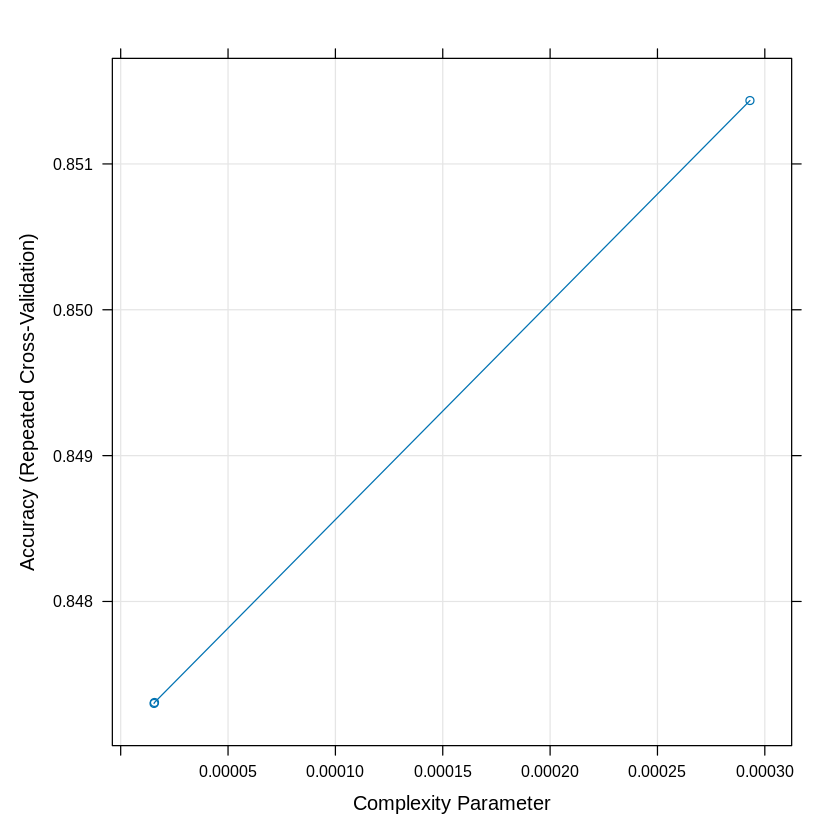

In [ ]:
plot(DTmodel)

In [ ]:
# install plotting tool
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



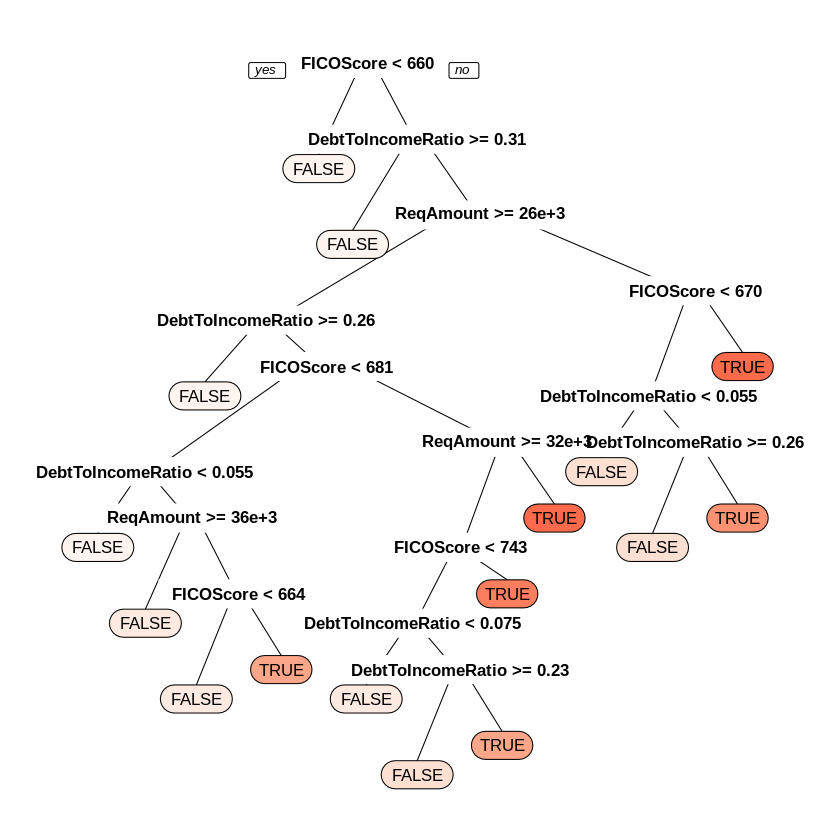

In [ ]:
#visualize decision tree
prp(DTmodel$finalModel, box.palette = "Reds", tweak = 1.2, varlen=20)

Splits:

* If your FICOScore is less than 660 than you will be disapproved
* if your Debt to income ratio is more or equal to 0.31 you will  be disapproved despite having an eligible FICO score
* If your request amount is more than or equal to 26e+3 you will be disapproved despite the eligible credit score and debt to income ratio.

Make predictions:

In [36]:
#new column
loans_test$ApprovalCART <- predict(DTmodel, newdata=loans_test)
#print it
loans_test$ApprovalCART
# how many were true/false
cat("False:")
sum(loans_test$ApprovalCART == 'FALSE')
cat("True:")
sum(loans_test$ApprovalCART == 'TRUE')



[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  TRUE  TRUE  TRUE 
  [325] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [337] FALSE TRUE  TRUE  FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [349] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [361] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE TRUE 
  [373] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE TRUE  TRUE  TRUE 
  [385] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [397] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [409] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [421] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

False:

[1] 21009

True:

[1] 28689

3. making the C5.0 classifier

In [ ]:
# install C5.0
install.packages("C50", dependencies = TRUE)
library(C50)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘inum’, ‘partykit’, ‘modeldata’




In [ ]:
# make C5.0 model
DTmodel2 <-  train(Approval ~ DebtToIncomeRatio + ReqAmount + FICOScore + Interest,
                  # use training data
                  data = loans_training,
                  # C5.0
                  method = "C5.0",
                  # C5.0 type
                  parms  = list(split = "entropy"),
                  # Accuracy
                  metric = "Accuracy",
                  # 10 field CV
                  trControl = trainControl(method="repeatedcv", number=10, repeats=3, search="random"),
                  #Settings
                  control = C5.0Control(minCases = 1000)
                  )

In [ ]:
# print details
print(DTmodel2$f)

C5.0 

150302 samples
     4 predictor
     2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135271, 135272, 135273, 135271, 135271, 135272, ... 
Resampling results across tuning parameters:

  model  winnow  trials  Accuracy   Kappa    
  rules  FALSE   66      0.8482589  0.6964839
  rules   TRUE   28      0.8485782  0.6971200
  tree    TRUE    8      0.8500197  0.6999804

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were trials = 8, model = tree and winnow
 = TRUE.


In [ ]:
DTmodel2$finalModel


Call:
(function (x, y, trials = 1, rules = FALSE, weights = NULL, control
 19000, 20000, 22000, 25000, 31000, 3000, 6000, 6000, 9000, 9000, 13000,
 39000, 500, 3000, 4000, 5000

Classification Tree
Number of samples: 150302 
Number of predictors: 4 

Number of boosting iterations: 8 
Average tree size: 7.4 

Non-standard options: attempt to group attributes, winnowing, minimum number
 of cases: 1000



In [ ]:
# Standalone model due to problems plotting in caret
c5model <- C5.0(Approval ~ DebtToIncomeRatio + ReqAmount + FICOScore + Interest,
                       data = loans_training,
                       trials = DTmodel2$bestTune$trials,
                       rules = FALSE,
                       control = C5.0Control(winnow = DTmodel$bestTune$winnow))

In [ ]:
png(file="plot2.png", width=2700, height=1050)
plot(c5model)
dev.off()

png 
  2

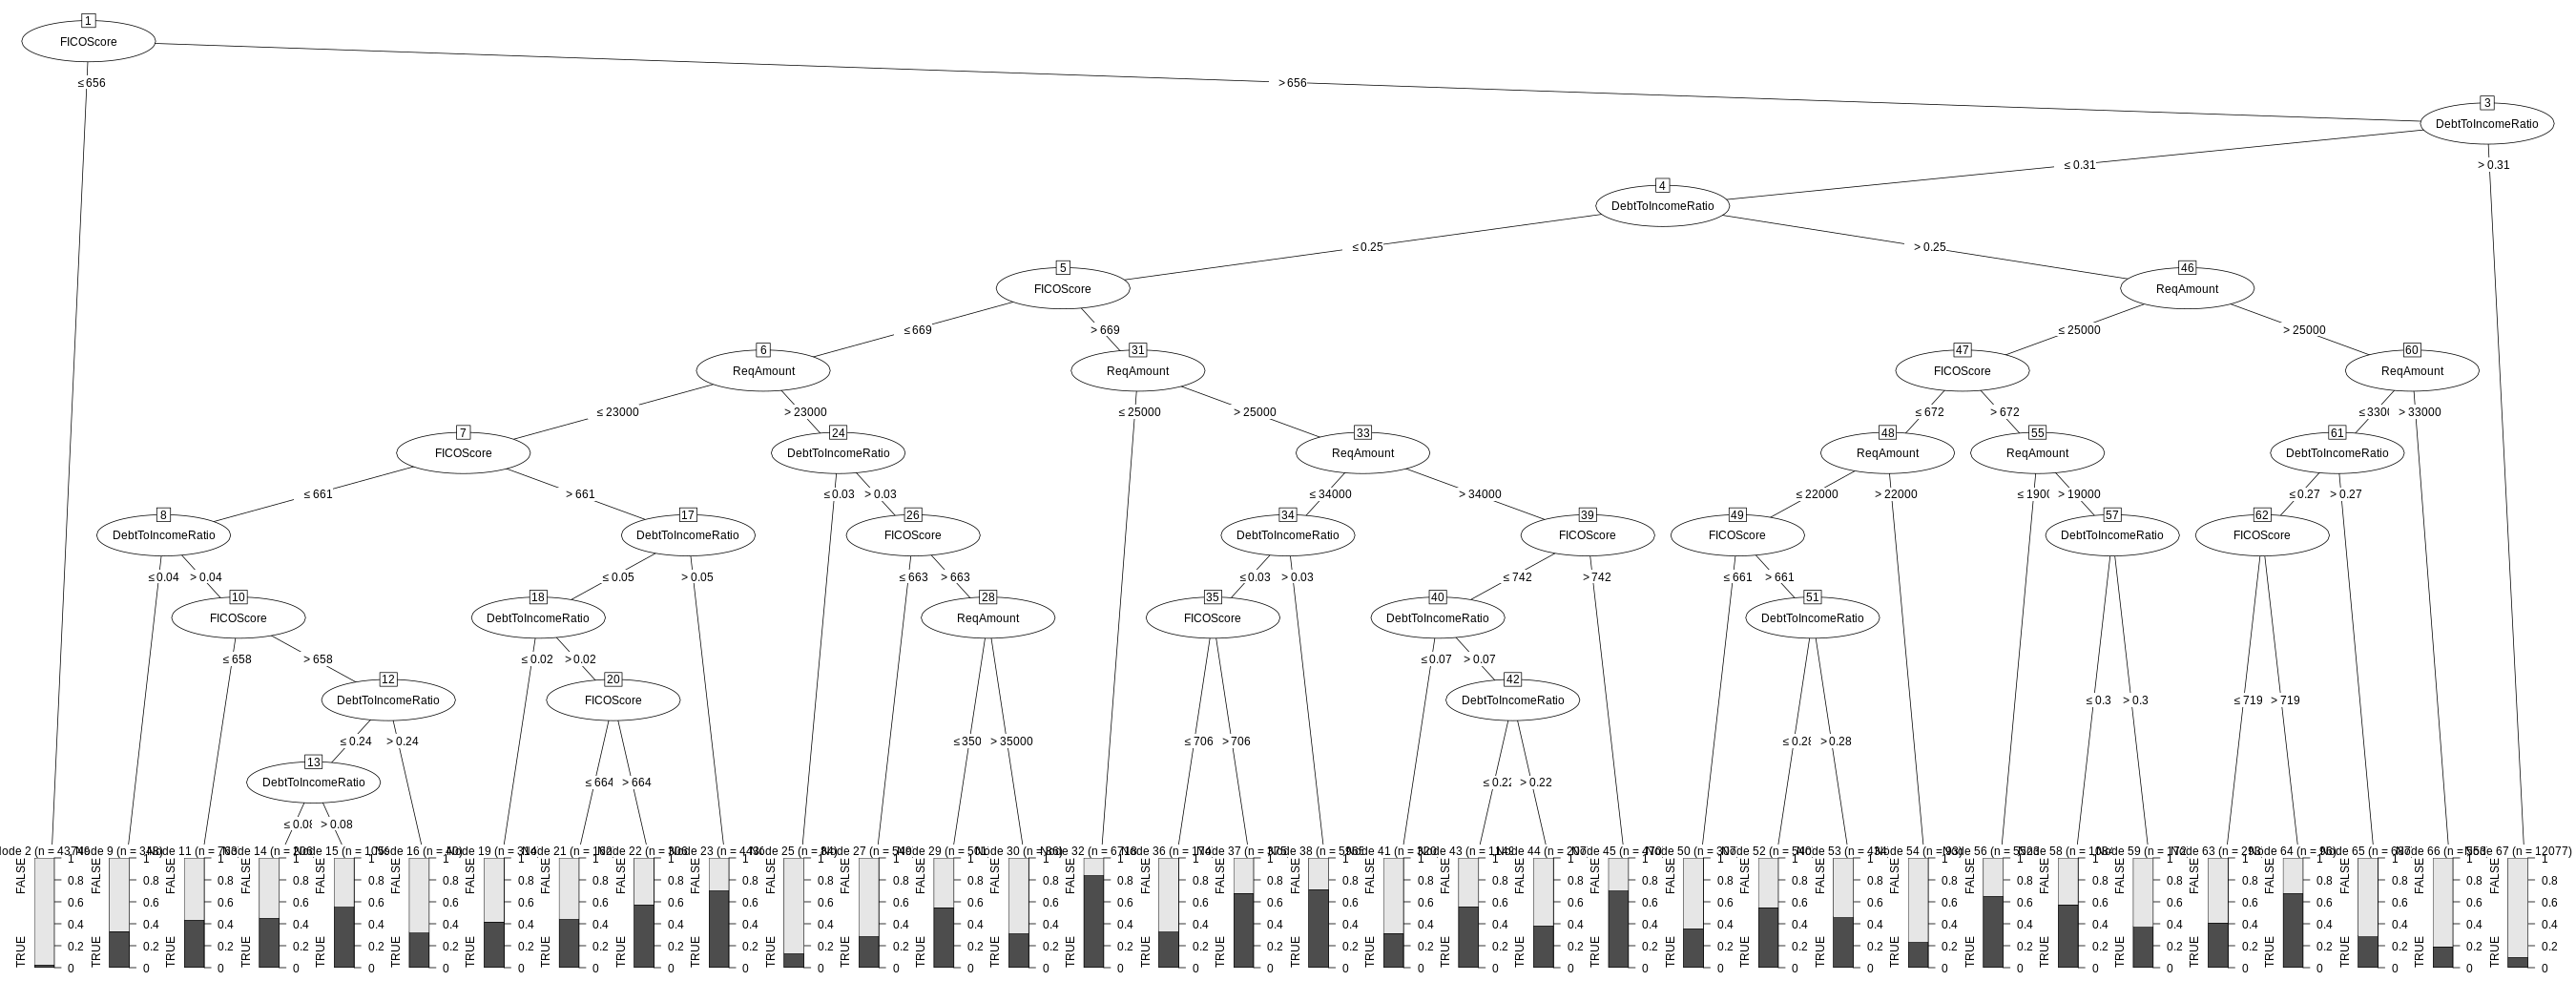

In [ ]:
library("IRdisplay")
display_png(file="plot2.png")

Splits:

* You are disapproved for loans if your FICO score is less than or equal to 656.
* You are most likely to be disapproved for loans (0.1 chance) if your Debt-to-income ratio is more than 0.31 despite having a FICOScore bigger than 656
* You are likely to get loans if your Debt-to-income ratio is less than or equal to 0.25, with a FICO score of more than 669, and if you request $25,000 or less.

Predictions:

In [35]:
#new column
loans_test$ApprovalC50 <- predict(DTmodel2, newdata=loans_test)
#print it
loans_test$ApprovalC50
# how many were true/false
cat("False:")
sum(loans_test$ApprovalC50 == 'FALSE')
cat("True:")
sum(loans_test$ApprovalC50 == 'TRUE')


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  TRUE  TRUE  TRUE 
  [325] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [337] FALSE TRUE  TRUE  FALSE TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [349] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [361] TRUE  TRUE  TRUE  TRUE  FALSE TRUE  TRUE  TRUE  TRUE  TRUE  FALSE TRUE 
  [373] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE TRUE  TRUE  TRUE 
  [385] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [397] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [409] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
  [421] TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

False:

[1] 20138

True:

[1] 29560

Comparison:

* Both models had higher chances of returning true if your FICO score is more than 670 and false if less than that

* Both had the same accuracy as well.

* The C5.0 model however, had a bigger decision tree, with more nodes.


